4. Implement Convolutional Neural Network using any suitable dataset
5. Apply different parameter running methodologies on CNN and analysis their
performance

In [1]:
import numpy as np

import pandas as pd 

from numpy import unique, argmax

from tensorflow.keras.datasets.mnist import load_data 

from tensorflow.keras import Sequential

from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import MaxPool2D
import seaborn as sns 

from tensorflow.keras.layers import Dense 

from tensorflow.keras.layers import Flatten 

from tensorflow.keras.layers import Dropout 

from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization

In [2]:
#loading the MNIST Dataset 

(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [3]:
#printing the shapes 

print(train_x.shape, train_y.shape)

print(test_x.shape , test_y.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
#reshaping train and test sets 

train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], train_x.shape[2], 1))

test_x = test_x .reshape((test_x.shape[0], test_x.shape[1], test_x.shape[2], 1))

In [7]:
#printing the shapes 

print(train_x.shape, train_y.shape)

print(test_x.shape , test_y.shape)

 

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [8]:
#normalizing the pixel values of images 

train_x = train_x.astype('float32')/255.0

test_x = test_x.astype('float32')/255.0

In [9]:
shape = train_x.shape[1:]

shape

(28, 28, 1)

In [11]:
#CNN Model 

model = Sequential()

#adding convolutional layer 

model.add(Conv2D(32, (3,3), activation='relu', input_shape= shape))

model.add(MaxPool2D((2,2)))

model.add(Conv2D(48, (3,3), activation='relu'))

model.add(MaxPool2D((2,2)))

# using dropout
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(500, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

In [13]:
#compiling model 

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics= ['accuracy'] )

x=model.fit(train_x, train_y, epochs=10, batch_size = 128, verbose= 2 , validation_split = 0.1)

Epoch 1/10
422/422 - 36s - loss: 0.2531 - accuracy: 0.9225 - val_loss: 0.0661 - val_accuracy: 0.9807 - 36s/epoch - 86ms/step
Epoch 2/10
422/422 - 34s - loss: 0.0830 - accuracy: 0.9742 - val_loss: 0.0459 - val_accuracy: 0.9870 - 34s/epoch - 80ms/step
Epoch 3/10
422/422 - 32s - loss: 0.0598 - accuracy: 0.9812 - val_loss: 0.0340 - val_accuracy: 0.9903 - 32s/epoch - 77ms/step
Epoch 4/10
422/422 - 37s - loss: 0.0501 - accuracy: 0.9836 - val_loss: 0.0328 - val_accuracy: 0.9903 - 37s/epoch - 88ms/step
Epoch 5/10
422/422 - 38s - loss: 0.0403 - accuracy: 0.9872 - val_loss: 0.0280 - val_accuracy: 0.9923 - 38s/epoch - 91ms/step
Epoch 6/10
422/422 - 38s - loss: 0.0379 - accuracy: 0.9872 - val_loss: 0.0295 - val_accuracy: 0.9925 - 38s/epoch - 90ms/step
Epoch 7/10
422/422 - 40s - loss: 0.0325 - accuracy: 0.9893 - val_loss: 0.0260 - val_accuracy: 0.9933 - 40s/epoch - 96ms/step
Epoch 8/10
422/422 - 40s - loss: 0.0288 - accuracy: 0.9905 - val_loss: 0.0266 - val_accuracy: 0.9932 - 40s/epoch - 94ms/step


In [14]:
#compiling model 

model.compile(optimizer='nadam', loss = 'sparse_categorical_crossentropy',metrics= ['accuracy'] )

history2=model.fit(train_x, train_y, epochs=10, batch_size = 128, verbose= 2 , validation_split = 0.1)

Epoch 1/10
422/422 - 45s - loss: 0.0221 - accuracy: 0.9929 - val_loss: 0.0256 - val_accuracy: 0.9937 - 45s/epoch - 105ms/step
Epoch 2/10
422/422 - 42s - loss: 0.0214 - accuracy: 0.9929 - val_loss: 0.0271 - val_accuracy: 0.9923 - 42s/epoch - 99ms/step
Epoch 3/10
422/422 - 39s - loss: 0.0192 - accuracy: 0.9935 - val_loss: 0.0242 - val_accuracy: 0.9945 - 39s/epoch - 93ms/step
Epoch 4/10
422/422 - 39s - loss: 0.0178 - accuracy: 0.9939 - val_loss: 0.0282 - val_accuracy: 0.9925 - 39s/epoch - 93ms/step
Epoch 5/10
422/422 - 39s - loss: 0.0168 - accuracy: 0.9942 - val_loss: 0.0266 - val_accuracy: 0.9935 - 39s/epoch - 92ms/step
Epoch 6/10
422/422 - 39s - loss: 0.0143 - accuracy: 0.9951 - val_loss: 0.0313 - val_accuracy: 0.9927 - 39s/epoch - 93ms/step
Epoch 7/10
422/422 - 41s - loss: 0.0145 - accuracy: 0.9948 - val_loss: 0.0244 - val_accuracy: 0.9938 - 41s/epoch - 98ms/step
Epoch 8/10
422/422 - 39s - loss: 0.0141 - accuracy: 0.9952 - val_loss: 0.0259 - val_accuracy: 0.9943 - 39s/epoch - 93ms/step

In [15]:
#compiling model 

model.compile(optimizer='Adagrad', loss = 'sparse_categorical_crossentropy',metrics= ['accuracy'] )

history3=model.fit(train_x, train_y, epochs=10, batch_size = 128, verbose= 2 , validation_split = 0.1)

Epoch 1/10
422/422 - 37s - loss: 0.0092 - accuracy: 0.9967 - val_loss: 0.0266 - val_accuracy: 0.9942 - 37s/epoch - 87ms/step
Epoch 2/10
422/422 - 35s - loss: 0.0082 - accuracy: 0.9970 - val_loss: 0.0265 - val_accuracy: 0.9943 - 35s/epoch - 82ms/step
Epoch 3/10
422/422 - 35s - loss: 0.0087 - accuracy: 0.9969 - val_loss: 0.0263 - val_accuracy: 0.9942 - 35s/epoch - 82ms/step
Epoch 4/10
422/422 - 35s - loss: 0.0080 - accuracy: 0.9974 - val_loss: 0.0265 - val_accuracy: 0.9943 - 35s/epoch - 82ms/step
Epoch 5/10
422/422 - 35s - loss: 0.0085 - accuracy: 0.9971 - val_loss: 0.0264 - val_accuracy: 0.9943 - 35s/epoch - 83ms/step
Epoch 6/10
422/422 - 35s - loss: 0.0086 - accuracy: 0.9971 - val_loss: 0.0262 - val_accuracy: 0.9943 - 35s/epoch - 82ms/step
Epoch 7/10
422/422 - 35s - loss: 0.0084 - accuracy: 0.9970 - val_loss: 0.0262 - val_accuracy: 0.9940 - 35s/epoch - 82ms/step
Epoch 8/10
422/422 - 35s - loss: 0.0079 - accuracy: 0.9972 - val_loss: 0.0261 - val_accuracy: 0.9942 - 35s/epoch - 83ms/step


In [17]:
#compiling model 

model.compile(optimizer='RMSProp', loss = 'sparse_categorical_crossentropy',metrics= ['accuracy'] )

history4=model.fit(train_x, train_y, epochs=10, batch_size = 128, verbose= 2 , validation_split = 0.1)

Epoch 1/10
422/422 - 33s - loss: 0.0098 - accuracy: 0.9966 - val_loss: 0.0274 - val_accuracy: 0.9957 - 33s/epoch - 78ms/step
Epoch 2/10
422/422 - 32s - loss: 0.0097 - accuracy: 0.9967 - val_loss: 0.0344 - val_accuracy: 0.9932 - 32s/epoch - 76ms/step
Epoch 3/10
422/422 - 33s - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.0349 - val_accuracy: 0.9942 - 33s/epoch - 78ms/step
Epoch 4/10
422/422 - 35s - loss: 0.0096 - accuracy: 0.9967 - val_loss: 0.0306 - val_accuracy: 0.9943 - 35s/epoch - 83ms/step
Epoch 5/10
422/422 - 36s - loss: 0.0099 - accuracy: 0.9968 - val_loss: 0.0329 - val_accuracy: 0.9938 - 36s/epoch - 86ms/step
Epoch 6/10
422/422 - 37s - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.0341 - val_accuracy: 0.9945 - 37s/epoch - 87ms/step
Epoch 7/10
422/422 - 37s - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0341 - val_accuracy: 0.9948 - 37s/epoch - 88ms/step
Epoch 8/10
422/422 - 39s - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.0289 - val_accuracy: 0.9947 - 39s/epoch - 92ms/step


In [19]:
#compiling model 

model.compile(optimizer='SGD', loss = 'sparse_categorical_crossentropy',metrics= ['accuracy'] )

history5=model.fit(train_x, train_y, epochs=10, batch_size = 128, verbose= 2 , validation_split = 0.1)

Epoch 1/10
422/422 - 30s - loss: 0.0063 - accuracy: 0.9978 - val_loss: 0.0303 - val_accuracy: 0.9947 - 30s/epoch - 71ms/step
Epoch 2/10
422/422 - 31s - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.0301 - val_accuracy: 0.9947 - 31s/epoch - 74ms/step
Epoch 3/10
422/422 - 33s - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.0298 - val_accuracy: 0.9950 - 33s/epoch - 79ms/step
Epoch 4/10
422/422 - 34s - loss: 0.0044 - accuracy: 0.9984 - val_loss: 0.0296 - val_accuracy: 0.9950 - 34s/epoch - 81ms/step
Epoch 5/10
422/422 - 34s - loss: 0.0052 - accuracy: 0.9981 - val_loss: 0.0296 - val_accuracy: 0.9947 - 34s/epoch - 81ms/step
Epoch 6/10
422/422 - 35s - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.0298 - val_accuracy: 0.9948 - 35s/epoch - 83ms/step
Epoch 7/10
422/422 - 38s - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.0300 - val_accuracy: 0.9947 - 38s/epoch - 90ms/step
Epoch 8/10
422/422 - 42s - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.0297 - val_accuracy: 0.9948 - 42s/epoch - 99ms/step


In [23]:
#using early stopping

In [26]:
#compiling model 

model.compile(optimizer='Adam', loss = 'sparse_categorical_crossentropy',metrics= ['accuracy'] )



In [29]:
from keras.callbacks import EarlyStopping
callsbacks=[EarlyStopping(monitor="val_accuracy",patience=3)]
model.fit(train_x,train_y,epochs=5,batch_size=2,validation_split=0)

Epoch 1/5
30000/30000 [==============================] - 279s 9ms/step - loss: 0.0783 - accuracy: 0.9786
Epoch 2/5
30000/30000 [==============================] - 286s 10ms/step - loss: 0.0761 - accuracy: 0.9783
Epoch 3/5
30000/30000 [==============================] - 280s 9ms/step - loss: 0.0752 - accuracy: 0.9801
Epoch 4/5
30000/30000 [==============================] - 288s 10ms/step - loss: 0.0745 - accuracy: 0.9807
Epoch 5/5
30000/30000 [==============================] - 268s 9ms/step - loss: 0.0733 - accuracy: 0.9806


In [30]:
#analysising the performance

In [38]:
#testdata set accuracy
loss, accuracy= model.evaluate(test_x, test_y, verbose = 0)

print(f'Accuracy: {accuracy*100}')

Accuracy: 98.83999824523926


In [41]:
y_pred = model.predict(test_x)

313/313 [==============================] - 4s 13ms/step


In [43]:
from sklearn.metrics import confusion_matrix


confusion=confusion_matrix(test_y, np.argmax(y_pred,axis=1))


In [44]:
print(confusion)

[[ 975    1    0    0    0    0    2    1    1    0]
 [   0 1132    0    1    0    0    0    2    0    0]
 [   0    2 1021    2    0    0    0    6    1    0]
 [   0    0    3  987    0   11    0    2    2    5]
 [   0    0    1    0  965    0    4    0    0   12]
 [   2    0    0    1    0  886    1    0    1    1]
 [   6    3    0    1    1    5  942    0    0    0]
 [   0    3    0    0    1    1    0 1020    1    2]
 [   3    0    3    1    0    1    0    1  962    3]
 [   0    1    1    0    8    1    0    4    0  994]]


In [45]:
from sklearn.metrics import classification_report

c =classification_report(test_y, np.argmax(y_pred,axis=1))

In [46]:
print(c)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# ploting loss vs accurcay

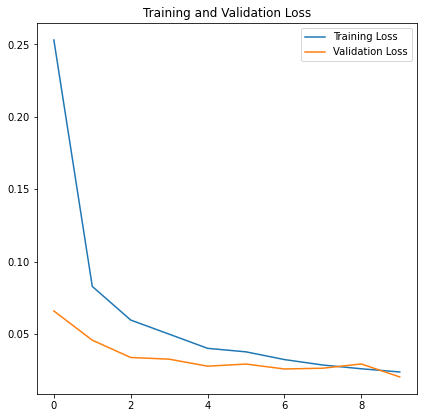

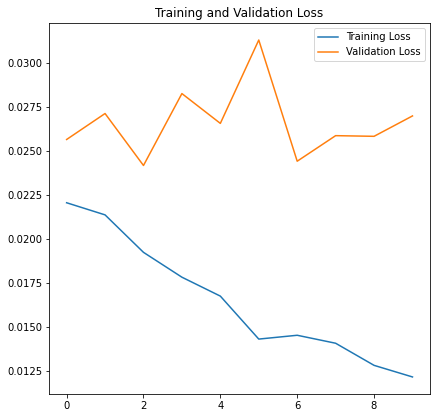

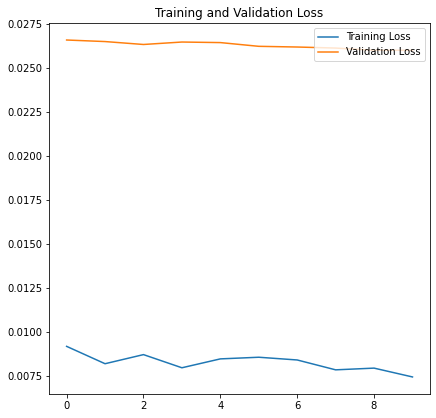

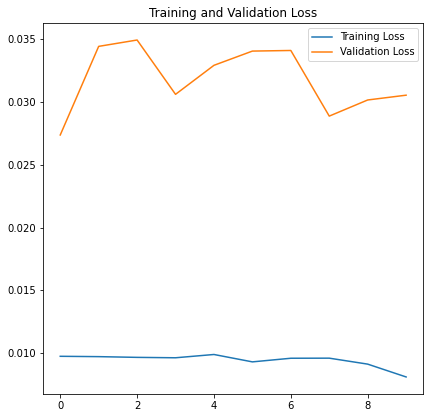

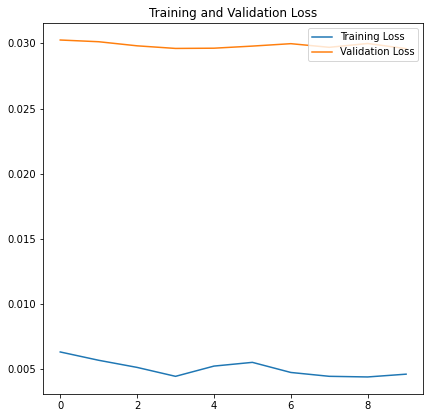

In [49]:
acc = x.history['accuracy']
val_acc = x.history['val_accuracy']
loss = x.history['loss']
val_loss = x.history['val_loss']
epochs_range = range(len(acc))
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()





acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs_range = range(len(acc))
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs_range = range(len(acc))
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs_range = range(len(acc))
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']
epochs_range = range(len(acc))
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Predictions Sample


C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 7 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 1 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 0 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 4 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s

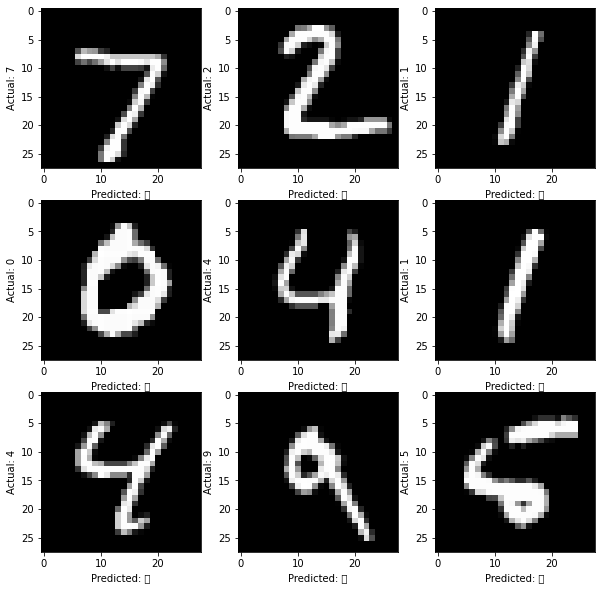

In [56]:
print("Predictions Sample")

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(test_x[i].reshape(28,28) ,cmap='gray')
    plt.ylabel(f"Actual: {test_y[i]}")
    plt.xlabel(f"Predicted: {chr( np.argmax(y_pred[i]+65))}")
    
plt.show()